In [38]:
# alpha^2 (y), L/Reff (x)
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
plt.style.use('../mplstyles/standard.mplstyle')

In [39]:
# You'll need to change this
# the fit data (alpha value comes from here)
fit_filename = "../imported-data/data_McGaugh_no_nan_trainingSet.csv"

In [40]:
# the L/Reff values
# don't change this
luminosity_filename = "../data/L_Reff_ratio.txt"

In [41]:
df_lum = pd.read_csv(luminosity_filename, sep="\t", skiprows=1)

In [42]:
df_lum.head()

,Galaxy,L/R sof
0,CamB_rotmod,0.061983
1,D564-8_rotmod,0.045833
2,D631-7_rotmod,0.160656
3,DDO154_rotmod,0.081538
4,DDO168_rotmod,0.148062


In [43]:
df_fit = pd.read_csv(fit_filename)

In [44]:
df_fit.head(5)

,Galaxy,chi_square,alpha,disk_scale,bulge_scale,phi_zero
0,NGC0055_rotmod,1.511529,35.976077,0.875189,1.0,7.259621e-07
1,UGC08837_rotmod,0.605448,309.134082,0.705505,1.0,2.298974e-07
2,UGC08490_rotmod,0.258130,17.668008,1.031360,1.0,1.084859e-06
3,UGC07866_rotmod,0.078243,55.680649,1.191333,1.0,1.617871e-07
4,NGC7793_rotmod,0.713321,4.209846,0.813581,1.0,1.406645e-06


In [45]:
merged = df_lum.merge(df_fit, on="Galaxy")

In [46]:
# take logs for the fit
logx = np.log(merged["L/R sof"].values)
logy = np.log(merged["alpha"].values)

In [47]:
# linear regression: log y = m log x + b
slope, intercept, r_value, p_value, stderr = linregress(logx, logy)

k = slope
A = np.exp(intercept)

print("k (power-law exponent) =", k)
print("A (prefactor) =", A)
print("R^2 =", r_value**2)

k (power-law exponent) = -0.9533653270221417
A (prefactor) = 34.969884626448476
R^2 = 0.7158382908759549


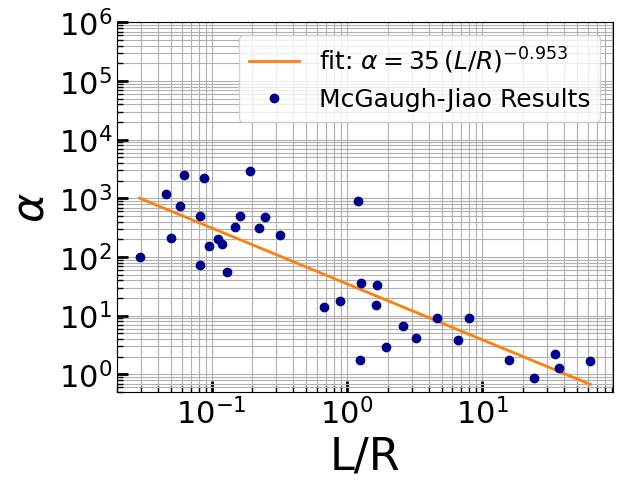

In [49]:
xx = np.linspace(min(merged["L/R sof"].values), max(merged["L/R sof"].values), 200)
yy = A * xx**k

midblue = '#1f77b4'
redorange = '#ff7f0e'

# plot the fit
plt.loglog(xx, yy, '-', color=redorange,
           label=rf"fit: $\alpha = {A:.3g}\,(L/R)^{{{k:.3g}}}$")

# plot the data
plt.loglog(merged["L/R sof"].values, merged["alpha"].values, 'o', color='darkblue',
           label="McGaugh-Jiao Results")

plt.xlabel("L/R")
plt.ylabel(r"$\alpha$")
plt.legend()
plt.grid(True, which="both")
#plt.xlim(10E-2,10E2)
plt.ylim(0.5,10E5)

plt.savefig("fit-analysis-plots/alpha-correlation-graph-mcgaugh.png",dpi=300, bbox_inches="tight")

plt.show()